In [1]:
import os
import pandas as pd
import joblib

# Path ke folder data
data_dir = 'beta_coef'

# Membaca semua file CSV di folder
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Membuat DataFrame untuk setiap file
for file in files:
    df_name = file.split('.')[0]  # Nama DataFrame berdasarkan nama file
    globals()[df_name] = pd.read_csv(os.path.join(data_dir, file))

# Verifikasi jumlah DataFrame yang dibuat
print(f"Total DataFrame yang dibuat: {len(files)}")

Total DataFrame yang dibuat: 10


In [2]:
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def smooth_dataframes(dfs: list[pd.DataFrame], smoothing: int) -> list[pd.DataFrame]:
    """
    Melakukan smoothing pada setiap DataFrame dalam daftar dfs, 
    kemudian melakukan MinMax scaling ke rentang [-1, 1].
    
    Parameters
    ----------
    dfs : list of pd.DataFrame
        Daftar DataFrame yang berisi data numerik.
    smoothing : int
        Window length untuk smoothing (harus bilangan ganjil > 1).
    
    Returns
    -------
    list of pd.DataFrame
        Daftar DataFrame yang sudah di-smoothing dan discale [-1, 1].
    """
    smoothed_dfs = []
    scaler = MinMaxScaler(feature_range=(-1, 1))
    
    for i, df in enumerate(dfs):
        numeric_df = df.select_dtypes(include='number')  # hanya kolom numerik
        
        # Smoothing dengan Savitzky-Golay filter
        smoothed = numeric_df.apply(
            lambda x: savgol_filter(x, window_length=smoothing, polyorder=2), axis=0
        )
        
        # Scaling ke [-1, 1]
        scaled = pd.DataFrame(
            scaler.fit_transform(smoothed),
            index=df.index,
            columns=df.columns
        )
        
        smoothed_dfs.append(scaled)
        print(f"✅ DataFrame {i+1} selesai di-smoothing dan scaling [-1, 1] (window={smoothing})")
        
    return smoothed_dfs


In [3]:
# transpose dari beta_mean_norm
cal_ori = beta_mean_norm.transpose()

# ambil baris pertama (misalnya index-nya 'a') sebagai header baru
new_header = cal_ori.iloc[0]   # ambil baris pertama
cal_ori = cal_ori[1:]          # hapus baris pertama
cal_ori.columns = new_header   # jadikan baris pertama sebagai header


In [4]:
dfs = [
    beta_fd1,
    beta_fd2,
    beta_max_norm,
    beta_mean_norm,
    beta_msc,
    beta_ori,
    beta_range_norm,
    beta_sg1,
    beta_sg2,
    beta_snv
]

# hapus kolom "Wavelength" dari semua dataframe
dfs = [df.drop(columns=["Wavelength"], errors="ignore") for df in dfs]

# assign kembali ke variabel aslinya
(
    beta_fd1,
    beta_fd2,
    beta_max_norm,
    beta_mean_norm,
    beta_msc,
    beta_ori,
    beta_range_norm,
    beta_sg1,
    beta_sg2,
    beta_snv
) = dfs


In [5]:
dfs = [
    beta_fd1,
    beta_fd2,
    beta_max_norm,
    beta_mean_norm,
    beta_msc,
    beta_ori,
    beta_range_norm,
    beta_sg1,
    beta_sg2,
    beta_snv
]

# misal smoothing window = 7 (harus ganjil)
smoothed_dfs = smooth_dataframes(dfs, smoothing=9)

# hasil bisa di-unpack kembali ke variabel masing-masing
(
    beta_fd1,
    beta_fd2,
    beta_max_norm,
    beta_mean_norm,
    beta_msc,
    beta_ori,
    beta_range_norm,
    beta_sg1,
    beta_sg2,
    beta_snv
) = smoothed_dfs


✅ DataFrame 1 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 2 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 3 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 4 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 5 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 6 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 7 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 8 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 9 selesai di-smoothing dan scaling [-1, 1] (window=9)
✅ DataFrame 10 selesai di-smoothing dan scaling [-1, 1] (window=9)


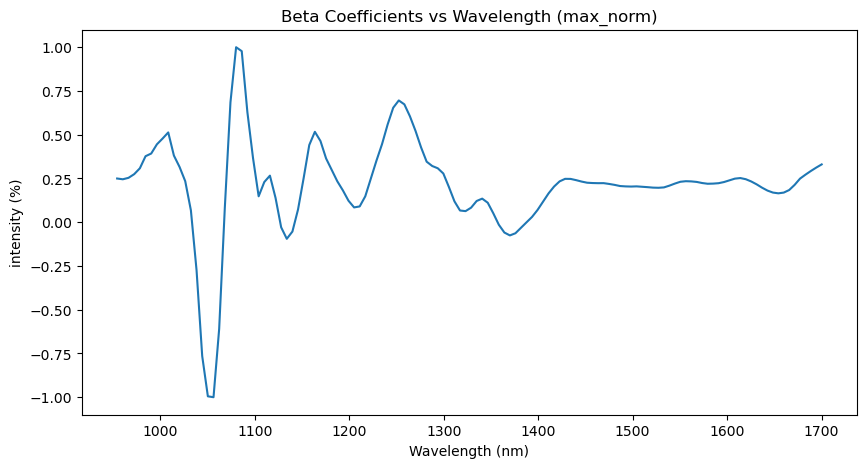

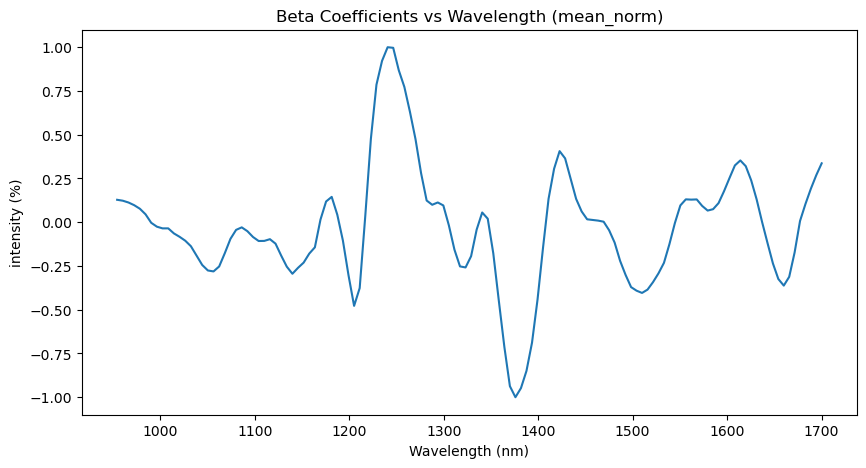

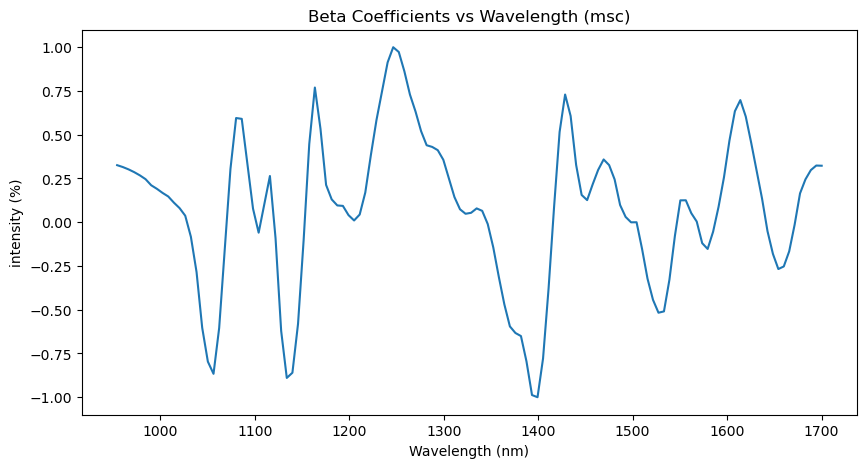

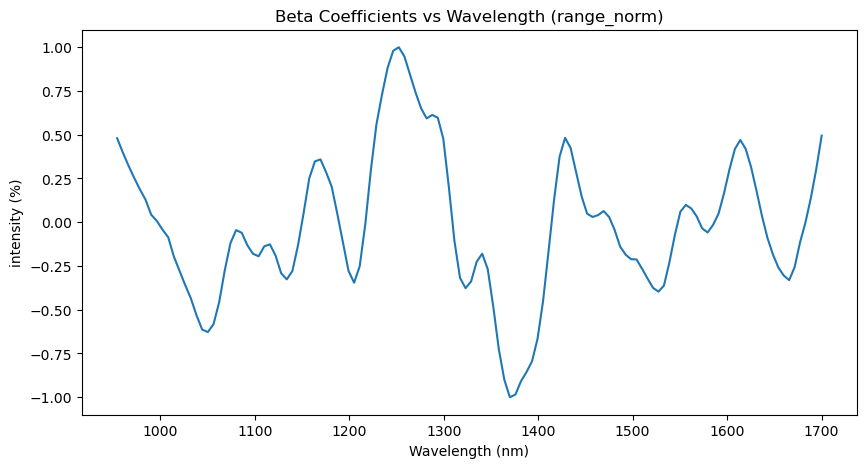

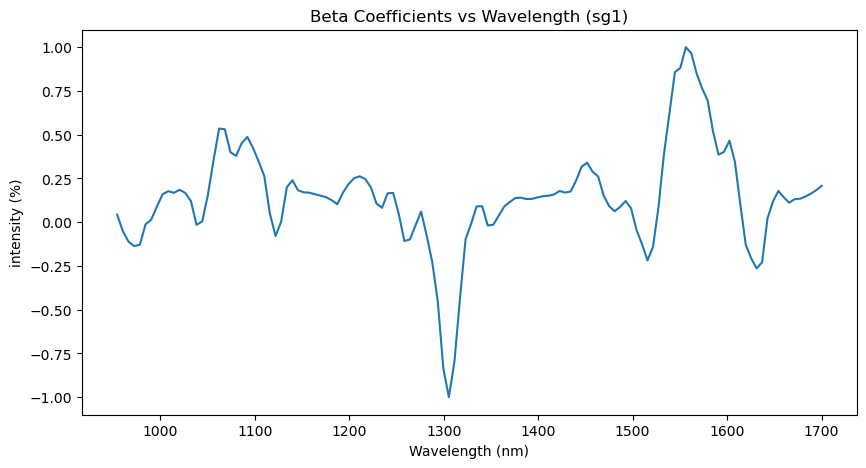

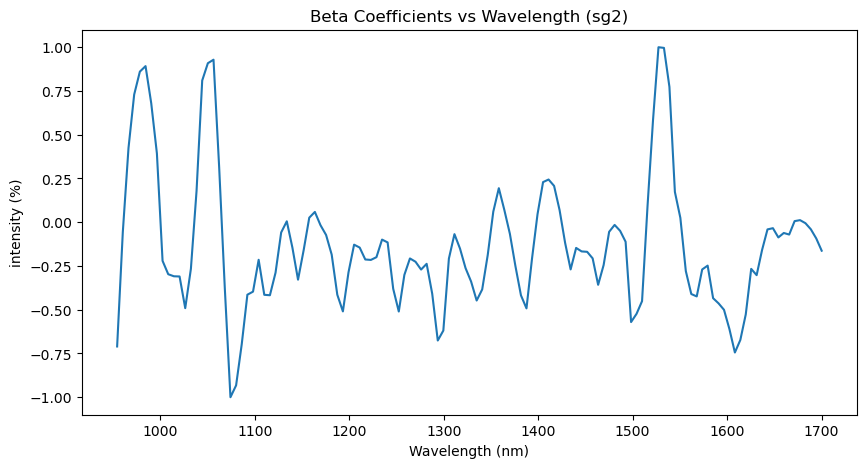

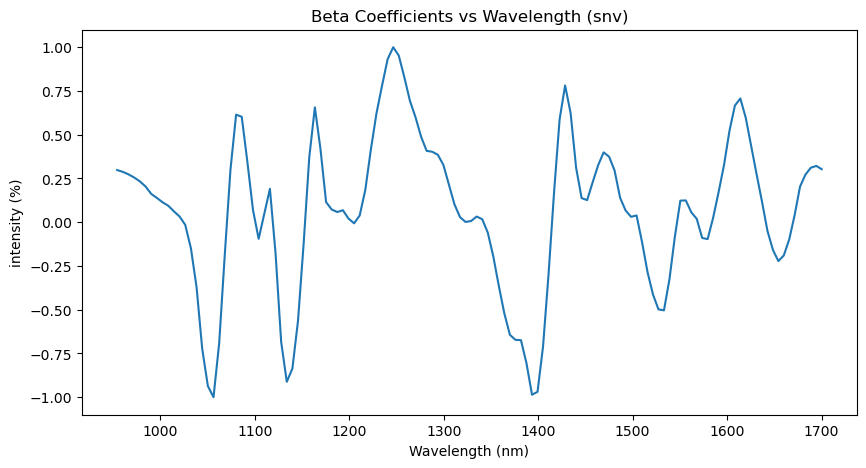

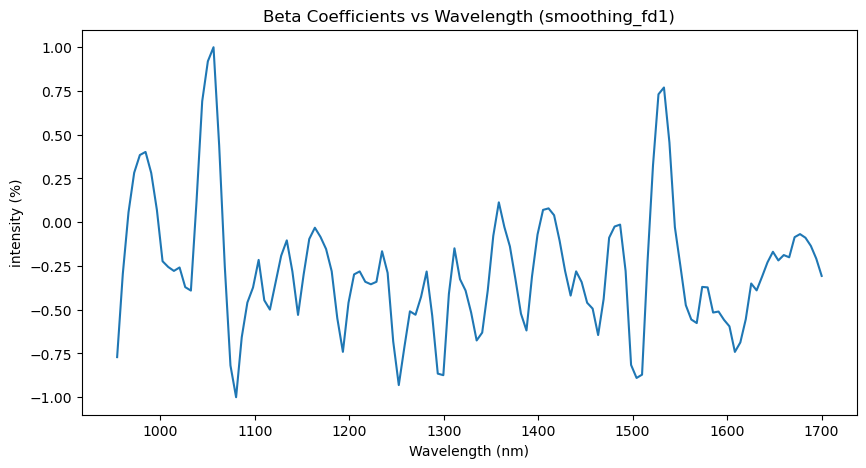

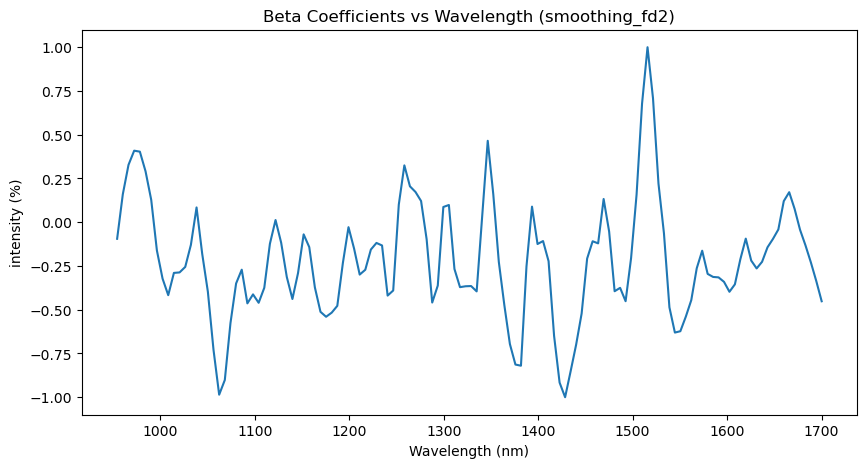

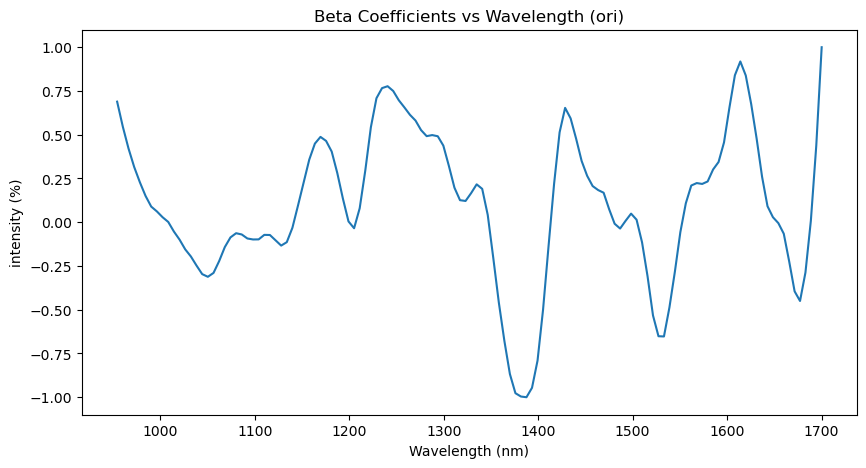

In [6]:
import matplotlib.pyplot as plt
# Plot Beta coefficients for each preprocessing method
beta_dict = {
    'max_norm': beta_max_norm,
    'mean_norm': beta_mean_norm,
    'msc': beta_msc,
    'range_norm': beta_range_norm,
    'sg1': beta_sg1,
    'sg2': beta_sg2,
    'snv': beta_snv,
    'smoothing_fd1': beta_fd1,
    'smoothing_fd2': beta_fd2,
    'ori': beta_ori
}

wl = [float(col) for col in cal_ori.columns if col != 'FENOL']


for name, beta_val in beta_dict.items():
    if hasattr(beta_val, 'flatten'):
        beta = beta_val.flatten()
    elif isinstance(beta_val, (list, tuple)) and len(beta_val) == 1:
        beta = beta_val[0]
    else:
        beta = beta_val

    plt.figure(figsize=(10, 5))
    plt.plot(wl, beta)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel(f'intensity (%)')
    plt.title(f'Beta Coefficients vs Wavelength ({name})')
    plt.show()